<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [50]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **math for 8th grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [20]:
pd.set_option('display.max_columns', None)

df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [21]:
df.shape
df["AVG_MATH_8_SCORE"].sample(20)

801     275.0
986     282.0
1705    287.0
1113    278.0
820       NaN
1045      NaN
1654    288.0
1074    278.0
1413      NaN
959       NaN
1134      NaN
973     273.0
1344    279.0
1129      NaN
693     284.0
156       NaN
955       NaN
1605      NaN
1349    259.0
1451      NaN
Name: AVG_MATH_8_SCORE, dtype: float64

In [53]:
# Rename some columns to make more sense
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PM',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [90]:
df.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL_ALL_EST                  42
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               42
CAPITAL_OUTLAY_EXPENDITURE       0
ENROLL_PREK                      4
ENROLL_KINDER                    0
ENROLL_4                         0
ENROLL_8                         0
ENROLL_12                        0
ENROLL_PM                        0
ENROLL_HS                        0
ENROLL_ALL                       0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             82
dtype: int64

In [54]:
# Drop rows with NaN for AVG_MATH_8_SCORE (will fill in data for TOTAL_EXPENDITURE, ENROLL_1-8 below)
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)
df.shape

(602, 25)

In [67]:
# Fill in data for ENROLL_ALL
# turns out, data missing ENROLL_ALL is also missing all other enrollment data
df[df.ENROLL_ALL.isna()][['ENROLL_PREK','ENROLL_PM','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PM         False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [56]:
df.ENROLL_ALL.isna().sum()

74

In [57]:
# Fill in data for TOTAL_EXPENDITURE
# Just like enrollment, if a row is missing total expenditure, it's also missing other expenditures
df[df.TOTAL_EXPENDITURE.isna()][['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].notna().any()

INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
dtype: bool

In [58]:
df["TOTAL_EXPENDITURE"].isna().sum()

163

In [59]:
# However, rows with no total expenditure also have no enroll_all data
print(df[df["TOTAL_EXPENDITURE"].isna()]["ENROLL_ALL"].notna().sum())
print(df[df["ENROLL_ALL"].isna()]["TOTAL_EXPENDITURE"].notna().sum())
print(df.shape)

89
0
(602, 25)


In [132]:
# So we drop the empty total_expenditure rows
df.dropna(subset=["TOTAL_EXPENDITURE", "AVG_READING_4_SCORE"], inplace=True)
print(df.shape)

(399, 26)


In [68]:
# Fill in data for ENROLL_PM
#Data missing ENROLL_PM is also missing ENROLL_HS, but has the other important parts, so we can use it
df[df.ENROLL_PM.isna()][['ENROLL_PREK','ENROLL_ALL','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK        True
ENROLL_ALL         True
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [91]:
# Fill in ENROLL_PM and ENROLL_HS data by finding the average % of all enrollment that is enroll_PM and HS
meanPME = (df["ENROLL_PM"]/df["ENROLL_ALL"]).mean()
meanHS = (df["ENROLL_HS"]/df["ENROLL_ALL"]).mean()
print(meanPME, meanHS)
df["ENROLL_PM"] = df["ENROLL_PM"].fillna(df["ENROLL_ALL"] * meanPME)
df["ENROLL_HS"] = df["ENROLL_HS"].fillna(df["ENROLL_ALL"] * meanHS)
print(df.shape)

0.2968028545301215 0.2968028545301215
(439, 25)


In [ ]:
df["AVG_READING_8_SCORE"]

In [92]:
# Check null values again - not that many left!
df.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL_ALL_EST                  42
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               42
CAPITAL_OUTLAY_EXPENDITURE       0
ENROLL_PREK                      4
ENROLL_KINDER                    0
ENROLL_4                         0
ENROLL_8                         0
ENROLL_12                        0
ENROLL_PM                        0
ENROLL_HS                        0
ENROLL_ALL                       0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             82
dtype: int64

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [112]:
df["EXPENDITURE_PER_PM_STUDENT"] = df["TOTAL_EXPENDITURE"] * (df["ENROLL_PM"]/(df["ENROLL_ALL"]**2))

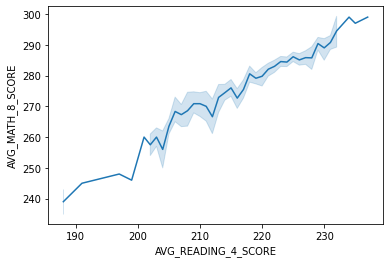

In [131]:
sns.lineplot(x=df.AVG_READING_4_SCORE, y=df.AVG_MATH_8_SCORE)
plt.show()

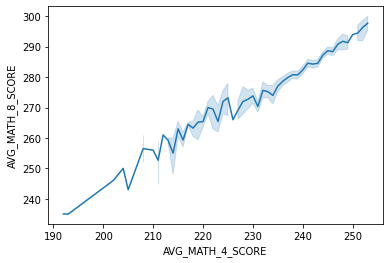

In [116]:
sns.lineplot(x=df.AVG_MATH_4_SCORE, y=df.AVG_MATH_8_SCORE)
plt.show()

Final feature list:
 - EXPENDITURE_PER_PM_STUDENT
 - AVG_MATH_8_SCORE
 - AVG_MATH_4_SCORE
 - AVG_READING_8_SCORE

Feature selection justification: 
    The distributions and interdependences between the 8th grade math, 8th grade reading, and 4th grade math scores could show something about the quality of education in the state at that year. Expenditure per PM student is a created feature that normalizes expenditure on primary school children by the size of the school system in the state (ENROLL_ALL), and measuring expenditure on <8th grade students is likely more linked to 8th grade scores than other expenditures

<h2> EDA </h2>

Visualization 1

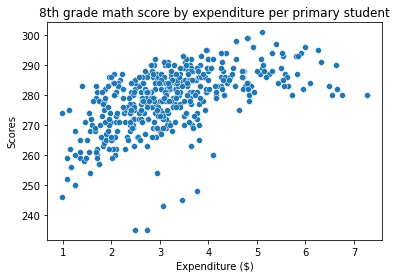

In [122]:
sns.scatterplot(x=df.EXPENDITURE_PER_PM_STUDENT, y=df.AVG_MATH_8_SCORE)
plt.ylabel("Scores")
plt.xlabel("Expenditure ($)")
plt.title("8th grade math score by expenditure per primary student")
plt.show()

This graph shows a positive correlation between expenditure per primary student and 8th grade math scores in a state in a year

Visualization 2

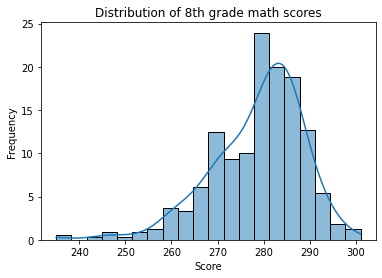

In [128]:
sns.histplot(x=df.AVG_MATH_8_SCORE, stat="frequency", kde=True)
plt.title("Distribution of 8th grade math scores")
plt.xlabel("Score")
plt.show()

This shows a fairly tight left-skewed distribution with a mean around 282 and low standard deviation, with most of the data falling within +/- 15 points from the mean

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [129]:
from sklearn.model_selection import train_test_split

In [133]:
X = df[["EXPENDITURE_PER_PM_STUDENT", "AVG_MATH_4_SCORE", "AVG_READING_4_SCORE"]]
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [150]:
# import your sklearn class here
from sklearn.linear_model import SGDRegressor, LogisticRegression, LinearRegression

In [151]:
# create your model here
model = LinearRegression()

In [152]:
model.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'AVG_MATH_8_SCORE')

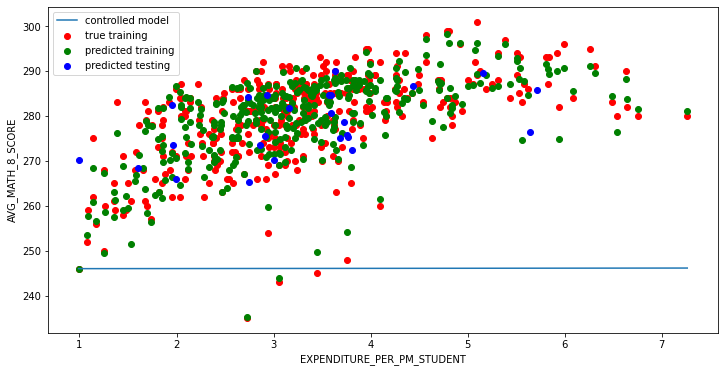

In [155]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "EXPENDITURE_PER_PM_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")

<h2> Summary </h2>

The linear model looks like it does a good job predicting the datapoints, suggesting a linear or almost-linear correlation between expenditure on primary students and 8th grade math scores